In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import polars as pl

%matplotlib inline

In [2]:
df_pd = pd.read_csv("../data/RAW_interactions.csv")
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


In [15]:
df_pl = pl.read_csv("../data/RAW_interactions.csv")
df_pl.describe()

statistic,user_id,recipe_id,date,rating,review
str,f64,f64,str,f64,str
"""count""",1.132367e6,1.132367e6,"""1132367""",1.132367e6,"""1132202"""
"""null_count""",0.0,0.0,"""0""",0.0,"""165"""
"""mean""",1.3843e8,160897.208164,null,4.411016,null
"""std""",5.0143e8,130398.719639,null,1.264752,null
"""min""",1533.0,38.0,"""2000-01-25""",0.0,""" This is good, just what I wa…"
"""25%""",135470.0,54257.0,null,4.0,null
"""50%""",330937.0,120547.0,null,5.0,null
"""75%""",804550.0,243852.0,null,5.0,null
"""max""",2.0024e9,537716.0,"""2018-12-20""",5.0,"""���������������� Best recipe !…"


In [17]:
df_pl.head()

user_id,recipe_id,date,rating,review
i64,i64,str,i64,str
38094,40893,"""2003-02-17""",4,"""Great with a salad. Cooked on …"
1293707,40893,"""2011-12-21""",5,"""So simple, so delicious! Great…"
8937,44394,"""2002-12-01""",4,"""This worked very well and is E…"
126440,85009,"""2010-02-27""",5,"""I made the Mexican topping and…"
57222,85009,"""2011-10-01""",5,"""Made the cheddar bacon topping…"


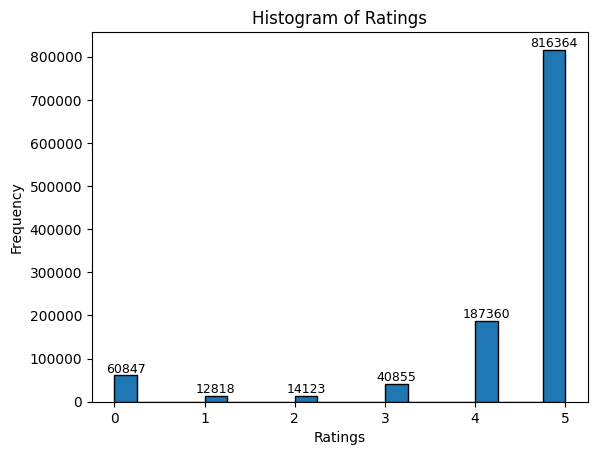

In [24]:
import polars as pl

rating_data = df_pl["rating"].to_list()

counts, bins, patches = plt.hist(rating_data, bins=20, edgecolor="black")

for i in range(len(counts)):
    if counts[i] > 0:
        plt.text(
            bins[i] + (bins[1] - bins[0]) / 2,
            counts[i] + 0.5,
            str(int(counts[i])),
            ha="center",
            va="bottom",
            fontsize=9,
        )

plt.title("Histogram of Ratings")
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.show()

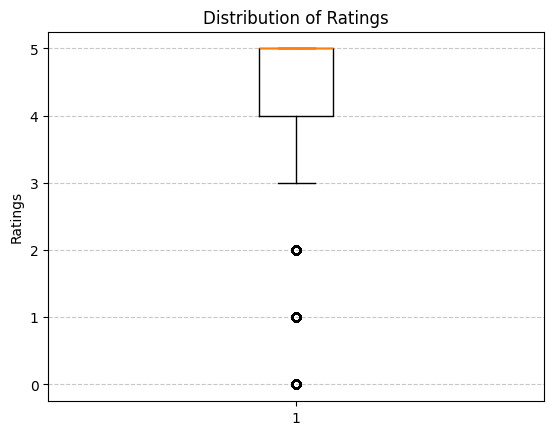

In [27]:
plt.boxplot(df_pl["rating"].to_list())
plt.title("Distribution of Ratings")
plt.ylabel("Ratings")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [4]:
!pwd

/home/lehoang510/Desktop/Telecom Paris/Big Data/kit_big_data_mangetamain/notebook


In [9]:
import polars as pl

df = pl.read_parquet("../data/processed/processed_recipes.parquet")

df.head()

name,recipe_id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
str,i64,i64,i64,datetime[μs],str,str,i64,str,str,str,i64
"""arriba baked winter squash m…",137739,55,47892,2005-09-16 00:00:00,"""['60-minutes-or-less', 'time-t…","""[51.5, 0.0, 13.0, 0.0, 2.0, 0.…",11,"""['make a choice and proceed wi…","""autumn is my favorite time of …","""['winter squash', 'mexican sea…",7
"""a bit different breakfast piz…",31490,30,26278,2002-06-17 00:00:00,"""['30-minutes-or-less', 'time-t…","""[173.4, 18.0, 0.0, 17.0, 22.0,…",9,"""['preheat oven to 425 degrees …","""this recipe calls for the crus…","""['prepared pizza crust', 'saus…",6
"""all in the kitchen chili""",112140,130,196586,2005-02-25 00:00:00,"""['time-to-make', 'course', 'pr…","""[269.8, 22.0, 32.0, 48.0, 39.0…",6,"""['brown ground beef in large p…","""this modified version of 'mom'…","""['ground beef', 'yellow onions…",13
"""alouette potatoes""",59389,45,68585,2003-04-14 00:00:00,"""['60-minutes-or-less', 'time-t…","""[368.1, 17.0, 10.0, 2.0, 14.0,…",11,"""['place potatoes in a large po…","""this is a super easy, great ta…","""['spreadable cheese with garli…",11
"""amish tomato ketchup for can…",44061,190,41706,2002-10-25 00:00:00,"""['weeknight', 'time-to-make', …","""[352.9, 1.0, 337.0, 23.0, 3.0,…",5,"""['mix all ingredients& boil fo…","""my dh's amish mother raised hi…","""['tomato juice', 'apple cider …",8


In [10]:
df = pl.read_parquet("../data/processed/processed_interactions.parquet")

df.head()

user_id,recipe_id,date,rating,review
i64,i64,datetime[μs],i64,str
38094,40893,2003-02-17 00:00:00,4,"""Great with a salad. Cooked on …"
1293707,40893,2011-12-21 00:00:00,5,"""So simple, so delicious! Great…"
8937,44394,2002-12-01 00:00:00,4,"""This worked very well and is E…"
126440,85009,2010-02-27 00:00:00,5,"""I made the Mexican topping and…"
57222,85009,2011-10-01 00:00:00,5,"""Made the cheddar bacon topping…"


In [11]:
df.describe()

statistic,user_id,recipe_id,date,rating,review
str,f64,f64,str,f64,str
"""count""",1.132202e6,1.132202e6,"""1132202""",1.132202e6,"""1132202"""
"""null_count""",0.0,0.0,"""0""",0.0,"""0"""
"""mean""",1.3818e8,160890.265345,"""2009-05-12 16:13:40.475498""",4.410973,null
"""std""",5.0099e8,130392.640521,null,1.26481,null
"""min""",1533.0,38.0,"""2000-01-25 00:00:00""",0.0,""" This is good, just what I wa…"
"""25%""",135470.0,54257.0,"""2007-03-11 00:00:00""",4.0,null
"""50%""",330937.0,120538.0,"""2008-12-28 00:00:00""",5.0,null
"""75%""",803689.0,243840.0,"""2011-03-06 00:00:00""",5.0,null
"""max""",2.0024e9,537716.0,"""2018-12-20 00:00:00""",5.0,"""���������������� Best recipe !…"


In [12]:
df["user_id"].n_unique()

226422

In [13]:
df["user_id"].len()

1132202

In [27]:
df_recipes = df.group_by("recipe_id").agg(
    [pl.count("rating").alias("n_ratings"), pl.mean("rating").alias("avg_rating")]
)
df_recipes.head()

recipe_id,n_ratings,avg_rating
i64,u32,f64
295856,4,4.25
44046,1,3.0
324694,2,5.0
49158,3,4.666667
441359,1,4.0


In [28]:
from scipy.stats import spearmanr, pearsonr

n_ratings = df_recipes["n_ratings"].to_numpy()
avg_rating = df_recipes["avg_rating"].to_numpy()

corr, pval = spearmanr(n_ratings, avg_rating)

print(f"Spearman correlation: {corr:.3f}, p-value: {pval:.3g}")

Spearman correlation: -0.155, p-value: 0


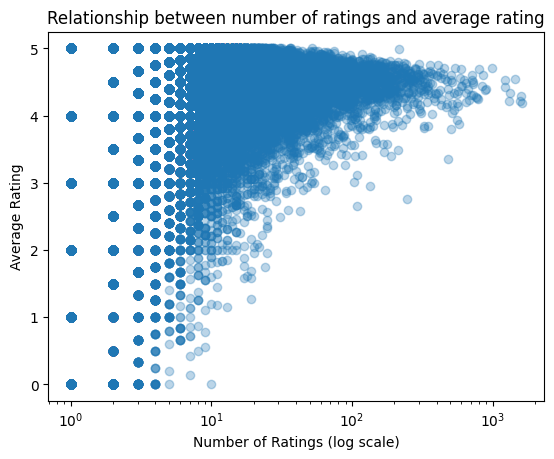

In [29]:
import matplotlib.pyplot as plt

plt.scatter(df_recipes["n_ratings"], df_recipes["avg_rating"], alpha=0.3)
plt.xscale("log")
plt.xlabel("Number of Ratings (log scale)")
plt.ylabel("Average Rating")
plt.title("Relationship between number of ratings and average rating")
plt.show()

In [33]:
import polars as pl
import numpy as np
import scipy.stats as stats

In [35]:
def analyse_rating_relation(df):
    """Analyse complète de la relation nombre de ratings vs moyenne"""

    # Agrégation par recette
    df_agg = df.group_by("recipe_id").agg(
        [
            pl.col("rating").mean().alias("avg_rating"),
            pl.col("rating").count().alias("rating_count"),
            pl.col("user_id").n_unique().alias("unique_users"),
        ]
    )

    # Création des groupes
    median_count = df_agg["rating_count"].median()
    df_agg = df_agg.with_columns(
        [
            pl.when(pl.col("rating_count") > median_count)
            .then(pl.lit("High_Count"))
            .otherwise(pl.lit("Low_Count"))
            .alias("ab_group")
        ]
    )

    # Tests statistiques
    high_group = df_agg.filter(pl.col("ab_group") == "High_Count")["avg_rating"]
    low_group = df_agg.filter(pl.col("ab_group") == "Low_Count")["avg_rating"]

    # Test t
    t_stat, p_value_t = stats.ttest_ind(high_group, low_group, nan_policy="omit")

    # Test de Mann-Whitney (non paramétrique)
    u_stat, p_value_mw = stats.mannwhitneyu(
        high_group, low_group, alternative="two-sided"
    )

    # Corrélation
    correlation = df_agg.select(pl.corr("rating_count", "avg_rating")).item()

    # Résultats
    results = {
        "high_count_mean": high_group.mean(),
        "low_count_mean": low_group.mean(),
        "high_count_size": len(high_group),
        "low_count_size": len(low_group),
        "t_statistic": t_stat,
        "t_p_value": p_value_t,
        "u_statistic": u_stat,
        "mw_p_value": p_value_mw,
        "correlation": correlation,
    }

    return df_agg, results


# Exécution de l'analyse
df_analysed, results = analyse_rating_relation(df)

# Affichage des résultats
print("=" * 50)
print("ANALYSE RELATION NOMBRE DE RATINGS vs MOYENNE")
print("=" * 50)
print(
    f"Groupe nombreux ratings (n={results['high_count_size']}): {results['high_count_mean']:.3f}"
)
print(
    f"Groupe peu de ratings (n={results['low_count_size']}): {results['low_count_mean']:.3f}"
)
print(f"Différence: {results['high_count_mean'] - results['low_count_mean']:.3f}")
print(f"\nTest t: p-value = {results['t_p_value']:.4f}")
print(f"Test Mann-Whitney: p-value = {results['mw_p_value']:.4f}")
print(f"Corrélation: {results['correlation']:.3f}")

# Interprétation
print(f"\nINTERPRÉTATION:")
if results["t_p_value"] < 0.05:
    print("✓ Il existe une différence significative entre les groupes")
else:
    print("x Aucune différence significative entre les groupes")

print(f"✓ Corrélation: {'positive' if results['correlation'] > 0 else 'negative'}")

ANALYSE RELATION NOMBRE DE RATINGS vs MOYENNE
Groupe nombreux ratings (n=94553): 4.417
Groupe peu de ratings (n=137078): 4.297
Différence: 0.120

Test t: p-value = 0.0000
Test Mann-Whitney: p-value = 0.0000
Corrélation: 0.018

INTERPRÉTATION:
✓ Il existe une différence significative entre les groupes
✓ Corrélation: positive


In [36]:
# Analyse par segments de popularité
df_segmented = df_analysed.with_columns(
    [
        pl.when(pl.col("rating_count") <= 10)
        .then(pl.lit("1-10"))
        .when(pl.col("rating_count") <= 50)
        .then(pl.lit("11-50"))
        .when(pl.col("rating_count") <= 100)
        .then(pl.lit("51-100"))
        .otherwise(pl.lit("100+"))
        .alias("segment")
    ]
)

# Statistiques par segment
segment_stats = (
    df_segmented.group_by("segment")
    .agg(
        [
            pl.col("avg_rating").mean().alias("moyenne_rating"),
            pl.col("avg_rating").std().alias("std_rating"),
            pl.col("recipe_id").count().alias("nb_recettes"),
        ]
    )
    .sort("segment")
)

print(segment_stats)

shape: (4, 4)
┌─────────┬────────────────┬────────────┬─────────────┐
│ segment ┆ moyenne_rating ┆ std_rating ┆ nb_recettes │
│ ---     ┆ ---            ┆ ---        ┆ ---         │
│ str     ┆ f64            ┆ f64        ┆ u32         │
╞═════════╪════════════════╪════════════╪═════════════╡
│ 1-10    ┆ 4.337658       ┆ 1.025376   ┆ 212869      │
│ 100+    ┆ 4.434521       ┆ 0.275186   ┆ 769         │
│ 11-50   ┆ 4.443824       ┆ 0.440447   ┆ 16666       │
│ 51-100  ┆ 4.441018       ┆ 0.304432   ┆ 1327        │
└─────────┴────────────────┴────────────┴─────────────┘


🚀 STARTING COMPREHENSIVE RATING ANALYSIS
🔍 INITIATING RATING COUNT vs AVERAGE RATING ANALYSIS
📊 Analyzing 231631 unique recipes
📈 Total ratings in dataset: 1132202


/tmp/ipykernel_58341/2183487611.py:113: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = ax2.boxplot(box_data, labels=['Low Rating Count', 'High Rating Count'])


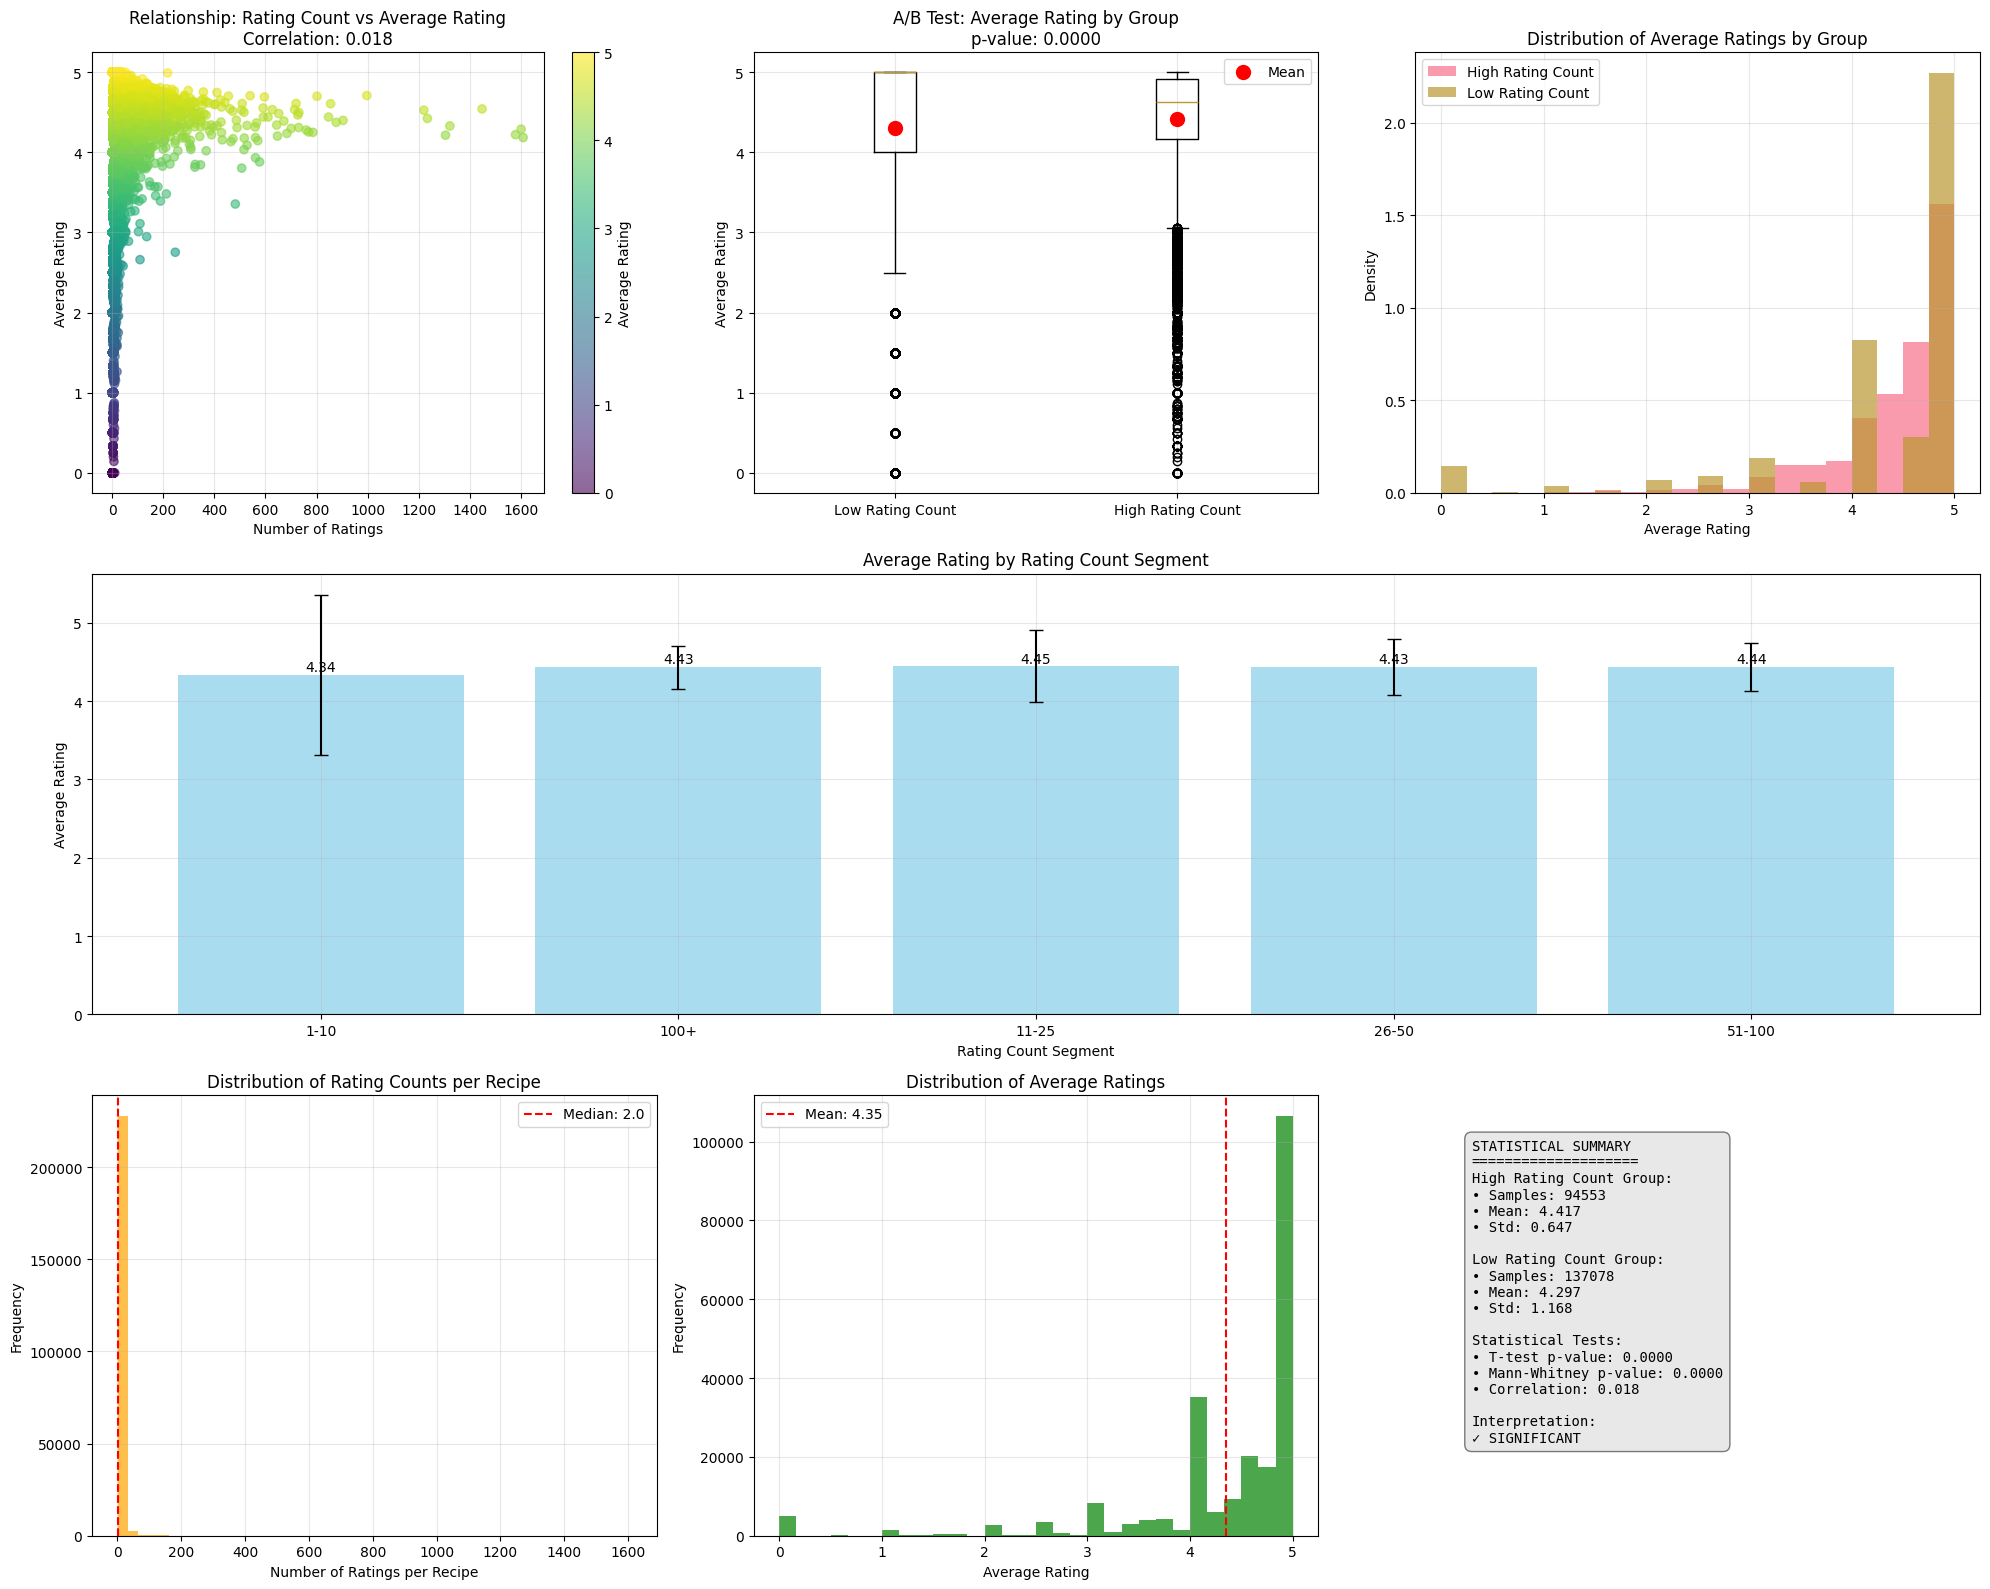


📊 STATISTICAL RESULTS
Group Comparison:
• High Rating Count (>2 ratings):
  n=94553, mean=4.417 ± 0.647
• Low Rating Count (≤2 ratings):
  n=137078, mean=4.297 ± 1.168
• Absolute difference: 0.120

📈 Statistical Tests:
• T-test: t=28.607, p=0.0000
• Mann-Whitney U: U=5500691042, p=0.0000
• Pearson Correlation: r=0.018

🎯 Segment Analysis:
•   1-10 ratings: 4.338 (n=212869)
•   100+ ratings: 4.435 (n=769)
•  11-25 ratings: 4.446 (n=13217)
•  26-50 ratings: 4.435 (n=3449)
• 51-100 ratings: 4.441 (n=1327)

🔍 INTERPRETATION:
✓ STATISTICALLY SIGNIFICANT: There is a meaningful relationship
  between rating count and average rating (p < 0.05)
  The relationship is positive (r = 0.018)

✅ ANALYSIS COMPLETE - Visualizations displayed above

🔍 ADDITIONAL ADVANCED ANALYSIS
• Correlation between rating count and rating std: 0.076
• Consistent recipes (low std): 104758
• Inconsistent recipes (high std): 34920
• Consistency vs Average rating p-value: 0.0000


In [38]:
import polars as pl
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Set style for better visualizations
plt.style.use("default")
sns.set_palette("husl")


def comprehensive_rating_analysis(df):
    """
    Comprehensive A/B test analysis between rating count and average rating
    """
    print("🔍 INITIATING RATING COUNT vs AVERAGE RATING ANALYSIS")
    print("=" * 60)

    # 1. Data aggregation by recipe
    df_agg = df.group_by("recipe_id").agg(
        [
            pl.col("rating").mean().alias("avg_rating"),
            pl.col("rating").count().alias("rating_count"),
            pl.col("user_id").n_unique().alias("unique_users"),
            pl.col("rating").std().alias("rating_std"),
        ]
    )

    print(f"📊 Analyzing {len(df_agg)} unique recipes")
    print(f"📈 Total ratings in dataset: {df_agg['rating_count'].sum()}")

    # 2. Create A/B test groups based on rating count median
    median_count = df_agg["rating_count"].median()
    df_agg = df_agg.with_columns(
        [
            pl.when(pl.col("rating_count") > median_count)
            .then(pl.lit("High_Rating_Count"))
            .otherwise(pl.lit("Low_Rating_Count"))
            .alias("ab_group"),
            pl.when(pl.col("rating_count") <= 10)
            .then(pl.lit("1-10"))
            .when(pl.col("rating_count") <= 25)
            .then(pl.lit("11-25"))
            .when(pl.col("rating_count") <= 50)
            .then(pl.lit("26-50"))
            .when(pl.col("rating_count") <= 100)
            .then(pl.lit("51-100"))
            .otherwise(pl.lit("100+"))
            .alias("rating_segment"),
        ]
    )

    # 3. Statistical tests
    high_group = df_agg.filter(pl.col("ab_group") == "High_Rating_Count")["avg_rating"]
    low_group = df_agg.filter(pl.col("ab_group") == "Low_Rating_Count")["avg_rating"]

    # T-test
    t_stat, p_value_t = stats.ttest_ind(high_group, low_group, nan_policy="omit")

    # Mann-Whitney U test
    u_stat, p_value_mw = stats.mannwhitneyu(
        high_group, low_group, alternative="two-sided"
    )

    # Correlation analysis
    correlation = df_agg.select(pl.corr("rating_count", "avg_rating")).item()

    # 4. Segment analysis
    segment_stats = (
        df_agg.group_by("rating_segment")
        .agg(
            [
                pl.col("avg_rating").mean().alias("segment_avg_rating"),
                pl.col("avg_rating").std().alias("segment_std_rating"),
                pl.col("recipe_id").count().alias("recipe_count"),
                pl.col("rating_count").mean().alias("avg_ratings_per_recipe"),
            ]
        )
        .sort("rating_segment")
    )

    # 5. Results compilation
    results = {
        "high_count_mean": high_group.mean(),
        "low_count_mean": low_group.mean(),
        "high_count_std": high_group.std(),
        "low_count_std": low_group.std(),
        "high_count_size": len(high_group),
        "low_count_size": len(low_group),
        "t_statistic": t_stat,
        "t_p_value": p_value_t,
        "u_statistic": u_stat,
        "mw_p_value": p_value_mw,
        "correlation": correlation,
        "median_rating_count": median_count,
        "segment_stats": segment_stats,
    }

    return df_agg, results


def create_comprehensive_visualizations(df_agg, results):
    """
    Create comprehensive visualizations for the A/B test analysis
    """
    fig = plt.figure(figsize=(20, 16))
    gs = GridSpec(3, 3, figure=fig)

    # 1. Scatter plot - Rating Count vs Average Rating
    ax1 = fig.add_subplot(gs[0, 0])
    scatter = ax1.scatter(
        df_agg["rating_count"],
        df_agg["avg_rating"],
        alpha=0.6,
        c=df_agg["avg_rating"],
        cmap="viridis",
    )
    ax1.set_xlabel("Number of Ratings")
    ax1.set_ylabel("Average Rating")
    ax1.set_title(
        "Relationship: Rating Count vs Average Rating\n"
        + f"Correlation: {results['correlation']:.3f}"
    )
    ax1.grid(True, alpha=0.3)
    plt.colorbar(scatter, ax=ax1, label="Average Rating")

    # 2. Box plot - A/B Group Comparison
    ax2 = fig.add_subplot(gs[0, 1])
    high_ratings = df_agg.filter(pl.col("ab_group") == "High_Rating_Count")[
        "avg_rating"
    ]
    low_ratings = df_agg.filter(pl.col("ab_group") == "Low_Rating_Count")["avg_rating"]

    box_data = [low_ratings, high_ratings]
    box_plot = ax2.boxplot(box_data, labels=["Low Rating Count", "High Rating Count"])
    ax2.set_ylabel("Average Rating")
    ax2.set_title(
        "A/B Test: Average Rating by Group\n" + f"p-value: {results['t_p_value']:.4f}"
    )
    ax2.grid(True, alpha=0.3)

    # Add mean markers
    ax2.scatter(
        [1, 2],
        [results["low_count_mean"], results["high_count_mean"]],
        color="red",
        zorder=3,
        label="Mean",
        s=100,
    )
    ax2.legend()

    # 3. Distribution plot
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.hist(high_ratings, alpha=0.7, label="High Rating Count", bins=20, density=True)
    ax3.hist(low_ratings, alpha=0.7, label="Low Rating Count", bins=20, density=True)
    ax3.set_xlabel("Average Rating")
    ax3.set_ylabel("Density")
    ax3.set_title("Distribution of Average Ratings by Group")
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # 4. Segment analysis - Average rating by rating count segment
    ax4 = fig.add_subplot(gs[1, :])
    segments = results["segment_stats"]["rating_segment"].to_list()
    segment_means = results["segment_stats"]["segment_avg_rating"].to_list()
    segment_stds = results["segment_stats"]["segment_std_rating"].to_list()

    bars = ax4.bar(
        segments,
        segment_means,
        yerr=segment_stds,
        capsize=5,
        alpha=0.7,
        color="skyblue",
    )
    ax4.set_xlabel("Rating Count Segment")
    ax4.set_ylabel("Average Rating")
    ax4.set_title("Average Rating by Rating Count Segment")
    ax4.grid(True, alpha=0.3)

    # Add value labels on bars
    for bar, value in zip(bars, segment_means):
        ax4.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 0.01,
            f"{value:.2f}",
            ha="center",
            va="bottom",
        )

    # 5. Rating count distribution
    ax5 = fig.add_subplot(gs[2, 0])
    ax5.hist(df_agg["rating_count"], bins=50, alpha=0.7, color="orange")
    ax5.axvline(
        results["median_rating_count"],
        color="red",
        linestyle="--",
        label=f"Median: {results['median_rating_count']:.1f}",
    )
    ax5.set_xlabel("Number of Ratings per Recipe")
    ax5.set_ylabel("Frequency")
    ax5.set_title("Distribution of Rating Counts per Recipe")
    ax5.legend()
    ax5.grid(True, alpha=0.3)

    # 6. Average rating distribution
    ax6 = fig.add_subplot(gs[2, 1])
    ax6.hist(df_agg["avg_rating"], bins=30, alpha=0.7, color="green")
    ax6.axvline(
        df_agg["avg_rating"].mean(),
        color="red",
        linestyle="--",
        label=f"Mean: {df_agg['avg_rating'].mean():.2f}",
    )
    ax6.set_xlabel("Average Rating")
    ax6.set_ylabel("Frequency")
    ax6.set_title("Distribution of Average Ratings")
    ax6.legend()
    ax6.grid(True, alpha=0.3)

    # 7. Statistical summary
    ax7 = fig.add_subplot(gs[2, 2])
    ax7.axis("off")

    summary_text = (
        f"STATISTICAL SUMMARY\n"
        f"{'=' * 20}\n"
        f"High Rating Count Group:\n"
        f"• Samples: {results['high_count_size']}\n"
        f"• Mean: {results['high_count_mean']:.3f}\n"
        f"• Std: {results['high_count_std']:.3f}\n\n"
        f"Low Rating Count Group:\n"
        f"• Samples: {results['low_count_size']}\n"
        f"• Mean: {results['low_count_mean']:.3f}\n"
        f"• Std: {results['low_count_std']:.3f}\n\n"
        f"Statistical Tests:\n"
        f"• T-test p-value: {results['t_p_value']:.4f}\n"
        f"• Mann-Whitney p-value: {results['mw_p_value']:.4f}\n"
        f"• Correlation: {results['correlation']:.3f}\n\n"
        f"Interpretation:\n"
        f"{'✓ SIGNIFICANT' if results['t_p_value'] < 0.05 else '× NOT SIGNIFICANT'}"
    )

    ax7.text(
        0.1,
        0.9,
        summary_text,
        transform=ax7.transAxes,
        fontfamily="monospace",
        verticalalignment="top",
        fontsize=10,
        bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.5),
    )

    plt.tight_layout()
    plt.show()

    return fig


def print_detailed_results(results):
    """
    Print comprehensive results analysis
    """
    print("\n📊 STATISTICAL RESULTS")
    print("=" * 50)

    print(f"Group Comparison:")
    print(f"• High Rating Count (>{results['median_rating_count']:.0f} ratings):")
    print(
        f"  n={results['high_count_size']:>4}, mean={results['high_count_mean']:.3f} ± {results['high_count_std']:.3f}"
    )
    print(f"• Low Rating Count (≤{results['median_rating_count']:.0f} ratings):")
    print(
        f"  n={results['low_count_size']:>4}, mean={results['low_count_mean']:.3f} ± {results['low_count_std']:.3f}"
    )
    print(
        f"• Absolute difference: {results['high_count_mean'] - results['low_count_mean']:.3f}"
    )

    print(f"\n📈 Statistical Tests:")
    print(f"• T-test: t={results['t_statistic']:.3f}, p={results['t_p_value']:.4f}")
    print(
        f"• Mann-Whitney U: U={results['u_statistic']:.0f}, p={results['mw_p_value']:.4f}"
    )
    print(f"• Pearson Correlation: r={results['correlation']:.3f}")

    print(f"\n🎯 Segment Analysis:")
    for seg, mean_rating, count in zip(
        results["segment_stats"]["rating_segment"].to_list(),
        results["segment_stats"]["segment_avg_rating"].to_list(),
        results["segment_stats"]["recipe_count"].to_list(),
    ):
        print(f"• {seg:>6} ratings: {mean_rating:.3f} (n={count})")

    print(f"\n🔍 INTERPRETATION:")
    if results["t_p_value"] < 0.05:
        print("✓ STATISTICALLY SIGNIFICANT: There is a meaningful relationship")
        print(f"  between rating count and average rating (p < 0.05)")
        direction = "positive" if results["correlation"] > 0 else "negative"
        print(f"  The relationship is {direction} (r = {results['correlation']:.3f})")
    else:
        print("× NOT STATISTICALLY SIGNIFICANT: No strong evidence of relationship")
        print(
            f"  between rating count and average rating (p = {results['t_p_value']:.3f})"
        )

    if abs(results["correlation"]) > 0.3:
        strength = "moderate" if abs(results["correlation"]) > 0.5 else "weak"
        print(f"  Note: {strength} correlation detected")


# Execute complete analysis
print("🚀 STARTING COMPREHENSIVE RATING ANALYSIS")
print("=" * 60)

# Perform analysis
df_analysed, results = comprehensive_rating_analysis(df)

# Create visualizations
fig = create_comprehensive_visualizations(df_analysed, results)

# Print detailed results
print_detailed_results(results)

print("\n" + "=" * 60)
print("✅ ANALYSIS COMPLETE - Visualizations displayed above")
print("=" * 60)


# Additional correlation matrix if you have multiple variables
def additional_analysis(df_analysed):
    """
    Additional advanced analysis
    """
    print("\n🔍 ADDITIONAL ADVANCED ANALYSIS")
    print("=" * 40)

    # Check if we have rating standard deviation
    if "rating_std" in df_analysed.columns:
        std_correlation = df_analysed.select(
            pl.corr("rating_count", "rating_std")
        ).item()
        print(
            f"• Correlation between rating count and rating std: {std_correlation:.3f}"
        )

        # Rating consistency analysis
        high_std_threshold = df_analysed["rating_std"].quantile(0.75)
        consistent_recipes = df_analysed.filter(
            pl.col("rating_std") < high_std_threshold
        )
        inconsistent_recipes = df_analysed.filter(
            pl.col("rating_std") >= high_std_threshold
        )

        print(f"• Consistent recipes (low std): {len(consistent_recipes)}")
        print(f"• Inconsistent recipes (high std): {len(inconsistent_recipes)}")

        if len(consistent_recipes) > 0 and len(inconsistent_recipes) > 0:
            t_stat_cons, p_val_cons = stats.ttest_ind(
                consistent_recipes["avg_rating"].to_list(),
                inconsistent_recipes["avg_rating"].to_list(),
            )
            print(f"• Consistency vs Average rating p-value: {p_val_cons:.4f}")


# Run additional analysis
additional_analysis(df_analysed)

In [47]:
import polars as pl
import matplotlib.pyplot as plt


def comprehensive_rating_analysis(df):
    """
    Comprehensive A/B test analysis between rating count and average rating
    """
    # 1. Data aggregation by recipe
    df_agg = df.group_by("recipe_id").agg(
        [
            pl.col("rating").mean().alias("avg_rating"),
            pl.col("rating").count().alias("rating_count"),
            pl.col("user_id").n_unique().alias("unique_users"),
            pl.col("rating").std().alias("rating_std"),
        ]
    )

    # 2. Create A/B test groups based on rating count median
    median_count = df_agg["rating_count"].median()
    df_agg = df_agg.with_columns(
        [
            pl.when(pl.col("rating_count") > median_count)
            .then(pl.lit("High_Rating_Count"))
            .otherwise(pl.lit("Low_Rating_Count"))
            .alias("ab_group"),
            pl.when(pl.col("rating_count") <= 10)
            .then(pl.lit("1-10"))
            .when(pl.col("rating_count") <= 25)
            .then(pl.lit("11-25"))
            .when(pl.col("rating_count") <= 50)
            .then(pl.lit("26-50"))
            .when(pl.col("rating_count") <= 100)
            .then(pl.lit("51-100"))
            .otherwise(pl.lit("100+"))
            .alias("rating_segment"),
        ]
    )

    # 3. Statistical tests
    high_group = df_agg.filter(pl.col("ab_group") == "High_Rating_Count")["avg_rating"]
    low_group = df_agg.filter(pl.col("ab_group") == "Low_Rating_Count")["avg_rating"]

    # T-test
    t_stat, p_value_t = stats.ttest_ind(high_group, low_group, nan_policy="omit")

    # Mann-Whitney U test
    u_stat, p_value_mw = stats.mannwhitneyu(
        high_group, low_group, alternative="two-sided"
    )

    # Correlation analysis
    correlation = df_agg.select(pl.corr("rating_count", "avg_rating")).item()

    results = {
        "high_count_mean": high_group.mean(),
        "low_count_mean": low_group.mean(),
        "high_count_std": high_group.std(),
        "low_count_std": low_group.std(),
        "high_count_size": len(high_group),
        "low_count_size": len(low_group),
        "t_statistic": t_stat,
        "t_p_value": p_value_t,
        "u_statistic": u_stat,
        "mw_p_value": p_value_mw,
        "correlation": correlation,
        "median_rating_count": median_count,
    }

    return df_agg, results


def create_scatter_plot(df_agg, correlation):
    """
    Create scatter plot: Rating Count vs Average Rating
    """
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        df_agg["rating_count"],
        df_agg["avg_rating"],
        alpha=0.6,
        c=df_agg["avg_rating"],
        cmap="viridis",
    )
    plt.xlabel("Number of Ratings")
    plt.ylabel("Average Rating")
    plt.title(
        f"Relationship: Rating Count vs Average Rating\nCorrelation: {correlation:.3f}"
    )
    plt.grid(True, alpha=0.3)
    plt.colorbar(scatter, label="Average Rating")
    plt.tight_layout()
    plt.show()


def create_box_plot(df_agg, results):
    """
    Create box plot: A/B Group Comparison
    """
    plt.figure(figsize=(10, 6))
    high_ratings = df_agg.filter(pl.col("ab_group") == "High_Rating_Count")[
        "avg_rating"
    ]
    low_ratings = df_agg.filter(pl.col("ab_group") == "Low_Rating_Count")["avg_rating"]

    box_data = [low_ratings, high_ratings]
    plt.boxplot(box_data, tick_labels=["Low Rating Count", "High Rating Count"])
    plt.ylabel("Average Rating")
    plt.title(f"A/B Test: Average Rating by Group\np-value: {results['t_p_value']:.4f}")
    plt.grid(True, alpha=0.3)

    # Add mean markers
    plt.scatter(
        [1, 2],
        [results["low_count_mean"], results["high_count_mean"]],
        color="red",
        zorder=3,
        label="Mean",
        s=100,
    )
    plt.legend()
    plt.tight_layout()
    plt.show()


def create_distribution_plot(df_agg):
    """
    Create distribution plot of average ratings by group
    """
    plt.figure(figsize=(10, 6))
    high_ratings = df_agg.filter(pl.col("ab_group") == "High_Rating_Count")[
        "avg_rating"
    ]
    low_ratings = df_agg.filter(pl.col("ab_group") == "Low_Rating_Count")["avg_rating"]

    plt.hist(high_ratings, alpha=0.7, label="High Rating Count", bins=20, density=True)
    plt.hist(low_ratings, alpha=0.7, label="Low Rating Count", bins=20, density=True)
    plt.xlabel("Average Rating")
    plt.ylabel("Density")
    plt.title("Distribution of Average Ratings by Group")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

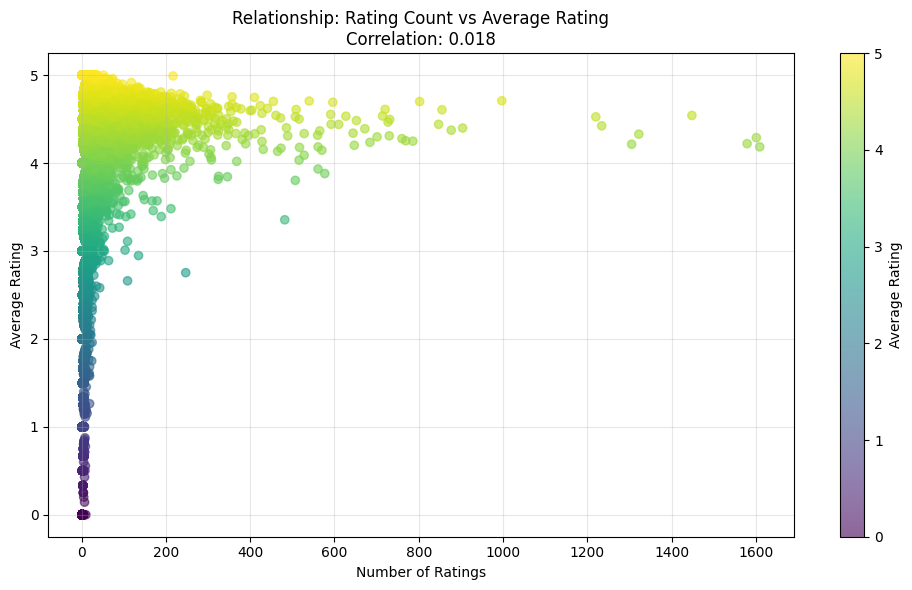

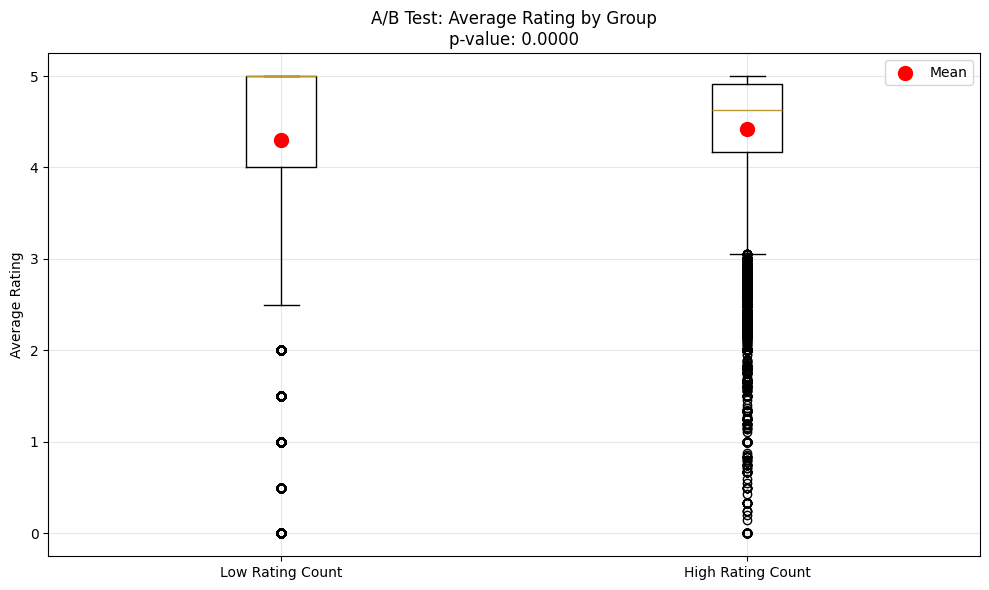

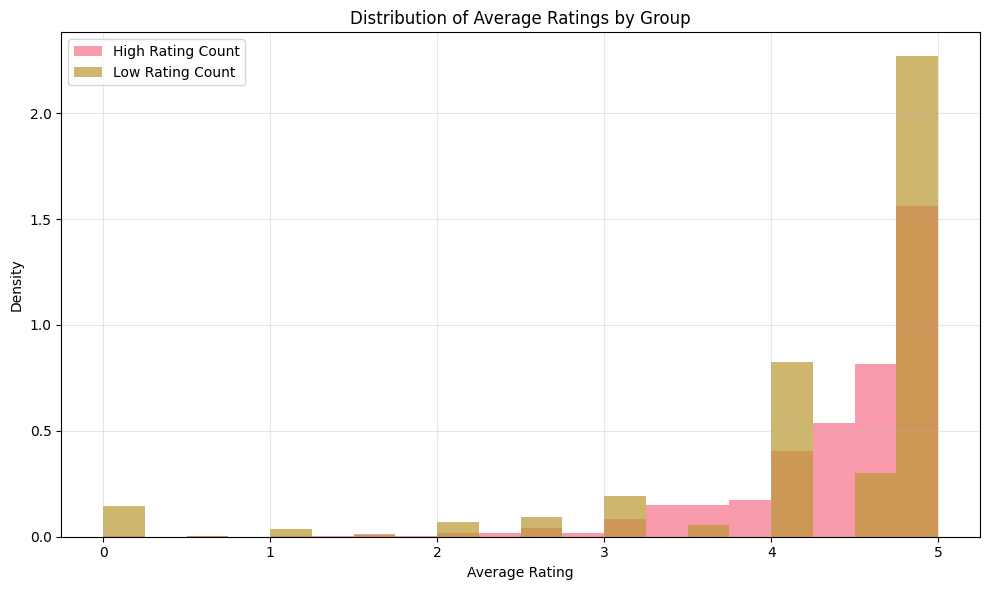

In [48]:
df_analysed, results = comprehensive_rating_analysis(df)

create_scatter_plot(df_analysed, results["correlation"])

create_box_plot(df_analysed, results)

create_distribution_plot(df_analysed)